In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
dataset =  pd.read_csv("Mall_Customers.csv")
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [20]:
X= dataset.iloc[:,[3,4]].values
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [21]:
from sklearn.cluster import KMeans

In [22]:
WCSS = []
for i in range(1,11):
    km = KMeans(n_clusters = i, init = 'k-means++',  max_iter = 300,  n_init = 10,  random_state = 0)
    km.fit(X)
    WCSS.append(km.inertia_)

WCSS=[]
for i in range (1,11):
        Km = KMeans(n_clusters = i, init = "k-means++", max_iter=300, n_init =10, random_state = 0)
        Km.fit(X)
        WCSS = WCSS.append(Km.inertia_)

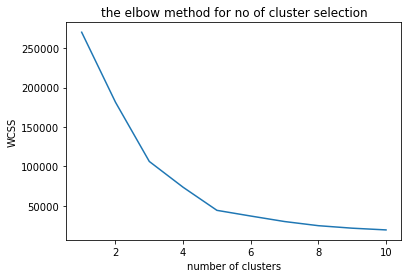

In [23]:
plt.plot(range(1, 11),  WCSS)
plt.title("the elbow method for no of cluster selection")
plt.xlabel("number of clusters")
plt.ylabel("WCSS")
plt.show()

In [24]:
km = KMeans(n_clusters = 5, init = "k-means++", max_iter=300, n_init =10, random_state = 0)

In [25]:
y_pred_kmeans = km.fit_predict(X)
y_pred_kmeans

array([3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 0,
       3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 4, 2, 0, 2, 4, 2, 4, 2,
       0, 2, 4, 2, 4, 2, 4, 2, 4, 2, 0, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2])

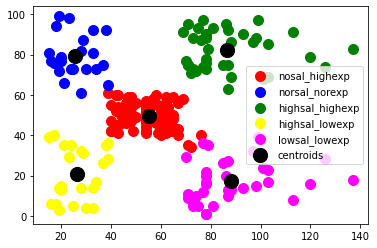

In [29]:
plt.scatter(X[y_pred_kmeans == 0, 0],X[y_pred_kmeans == 0, 1], s = 100 , c = 'red', label = 'nosal_highexp')
plt.scatter(X[y_pred_kmeans == 1, 0],X[y_pred_kmeans == 1, 1], s = 100 , c = 'blue', label = 'norsal_norexp')
plt.scatter(X[y_pred_kmeans == 2, 0],X[y_pred_kmeans == 2, 1], s = 100 , c = 'green', label = 'highsal_highexp')
plt.scatter(X[y_pred_kmeans == 3, 0],X[y_pred_kmeans == 3, 1], s = 100 , c = 'yellow', label = 'highsal_lowexp')
plt.scatter(X[y_pred_kmeans == 4, 0],X[y_pred_kmeans == 4, 1], s = 100 , c = 'magenta', label = 'lowsal_lowexp')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1], s = 200, c= 'black', label ='centroids')
plt.legend()
plt.show()